In [15]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv("Data/notes_étudiants.csv", sep=',', index_col='id' )
n = data.shape[0]
p = data.shape[1]


# Application de l'ACP

In [16]:
s_scaler = StandardScaler()
scaled_data = s_scaler.fit_transform(data)


In [17]:
print(np.mean(scaled_data,axis=0))

[ 1.31208176e-16  4.37360585e-17 -1.07657990e-16  9.08364293e-17
 -1.95130107e-16 -1.48029737e-16 -9.42007415e-17  1.61486985e-16
 -1.68215610e-16  8.99953512e-17]


In [18]:
print(np.std(scaled_data,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
pca = PCA()
coords = pca.fit_transform(scaled_data)

In [20]:
eigenvalues = (n-1)/n*pca.explained_variance_
print(eigenvalues)

[3.98951516 2.92685816 1.68480992 0.95143398 0.15181819 0.09921712
 0.07789282 0.06330248 0.03001295 0.02513922]


# Interprétation des résultats sur les individus

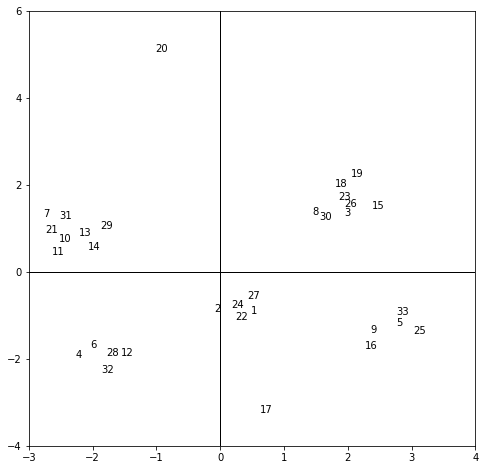

In [21]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-3,4)
axes.set_ylim(-4,6)
plt.plot([-3,4],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-4,6],color='black',linewidth=1)

for i in range(n):
    plt.annotate(data.index[i],(coords[i,0],coords[i,1]))

# Etude des variables

In [22]:
sqrt_eigenvalues = np.sqrt(eigenvalues)
corvar = np.zeros((p,p))
for i in range(p):
    corvar[:,i] = pca.components_[i,:] * sqrt_eigenvalues[i]

In [23]:
#LEs variables en ligne et les facteurs en colonne
corvar

array([[ 1.91638216e-01, -9.13990875e-01,  2.83831201e-01,
         8.67707283e-03, -5.14170130e-02, -5.31540254e-02,
        -1.96592911e-01, -9.47633510e-03, -3.39060248e-02,
         4.36208723e-02],
       [ 2.53726791e-01, -9.06290738e-01,  2.30384235e-01,
        -9.20462180e-02, -4.30145248e-02, -1.53161835e-01,
         1.53445769e-01, -3.10747890e-02,  5.32393658e-02,
         7.47917715e-03],
       [ 1.57962536e-01, -9.39140866e-01,  1.19398398e-01,
        -1.22114368e-01,  9.60689103e-02,  2.19133779e-01,
         5.37130849e-02,  5.02084420e-02, -2.03572072e-02,
        -2.87250124e-02],
       [-7.85477989e-01, -3.37559863e-01, -4.54167711e-01,
        -2.68574965e-02, -1.80090837e-01,  6.21294427e-02,
         1.35053018e-02, -1.56311843e-01, -2.65066915e-02,
        -2.18372557e-02],
       [-7.91712174e-01, -2.85526320e-01, -4.64489087e-01,
         1.62702003e-01, -1.36507280e-01,  3.02614253e-04,
         1.32845364e-02,  1.68359395e-01,  2.68839361e-02,
         3.

In [24]:
print(pd.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1], 'COR_3':corvar[:,2]}))

                    id     COR_1     COR_2     COR_3
0        Mathématiques  0.191638 -0.913991  0.283831
1             Physique  0.253727 -0.906291  0.230384
2  Sciences_Naturelles  0.157963 -0.939141  0.119398
3             Histoire -0.785478 -0.337560 -0.454168
4           Géographie -0.791712 -0.285526 -0.464489
5          Philosophie -0.689147 -0.401413 -0.465376
6             Français  0.875155 -0.038146 -0.442291
7              Anglais  0.758663 -0.040075 -0.626080
8             Allemand  0.845973 -0.163645 -0.474515
9                Sport -0.296001  0.041052 -0.292510


In [25]:
 print(corvar[9,:])

[-0.29600097  0.04105206 -0.29251011 -0.90496406  0.05345206 -0.03410623
 -0.03846889  0.01900634  0.01691409  0.00533787]


Text(0.5, 1.0, 'Cercle des corrélations')

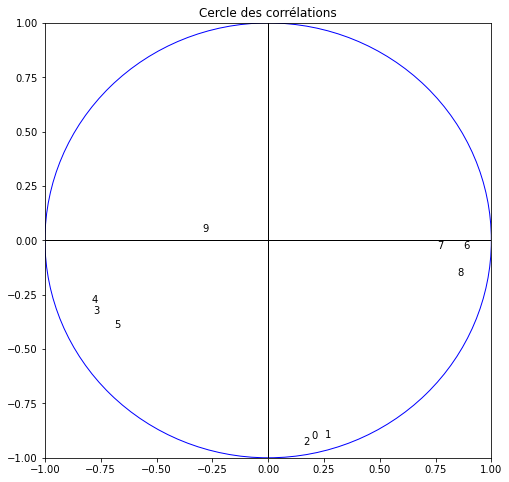

In [26]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(p):
    plt.annotate(data.columns.get_loc(data.columns[j]),(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(circle)
plt.title("Cercle des corrélations") 

In [27]:
cos2_var = corvar**2
print(pd.DataFrame({'id':data.columns,'COS2_1':cos2_var[:,0],'COS2_2':cos2_var[:,1], 'COS2_3':cos2_var[:,2], 'COS2_4':cos2_var[:,3]}))

                    id    COS2_1    COS2_2    COS2_3    COS2_4
0        Mathématiques  0.036725  0.835379  0.080560  0.000075
1             Physique  0.064377  0.821363  0.053077  0.008473
2  Sciences_Naturelles  0.024952  0.881986  0.014256  0.014912
3             Histoire  0.616976  0.113947  0.206268  0.000721
4           Géographie  0.626808  0.081525  0.215750  0.026472
5          Philosophie  0.474923  0.161132  0.216575  0.065122
6             Français  0.765897  0.001455  0.195621  0.005378
7              Anglais  0.575570  0.001606  0.391976  0.004797
8             Allemand  0.715670  0.026780  0.225165  0.006523
9                Sport  0.087617  0.001685  0.085562  0.818960


In [28]:
ctrvar = cos2_var
for i in range(p):
    ctrvar[:,i] = ctrvar[:,i]/eigenvalues[i]
print(pd.DataFrame({'id':data.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2], 'CTR_4':ctrvar[:,3]}))

                    id     CTR_1     CTR_2     CTR_3     CTR_4
0        Mathématiques  0.009205  0.285418  0.047816  0.000079
1             Physique  0.016137  0.280630  0.031503  0.008905
2  Sciences_Naturelles  0.006254  0.301342  0.008461  0.015673
3             Histoire  0.154649  0.038931  0.122428  0.000758
4           Géographie  0.157114  0.027854  0.128056  0.027823
5          Philosophie  0.119043  0.055053  0.128545  0.068447
6             Français  0.191977  0.000497  0.116109  0.005653
7              Anglais  0.144271  0.000549  0.232653  0.005042
8             Allemand  0.179388  0.009150  0.133644  0.006856
9                Sport  0.021962  0.000576  0.050784  0.860764
